In [1]:
import pandas as pd
import os
print("cwd:", os.getcwd())

df = pd.read_csv("../data/cleaned_ids2018_sampled.csv", low_memory=False)
print("shape:", df.shape)
df.head()


cwd: C:\Users\Antonio\smart-incident-dashboard\notebooks
shape: (1252846, 79)


,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,512109,443,6,60991608,14,14,1211,3396,875,0,...,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,807703,53,17,27292,1,1,45,163,45,45,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,491912,443,6,70343424,17,20,1118,5653,258,0,...,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,858679,53,17,137267,2,2,94,214,47,47,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


In [2]:
print(df.info())
print("\nLabel distribution:")
print(df['Label'].value_counts())
print("\nColumns:", df.columns.tolist()[:50])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252846 entries, 0 to 1252845
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1252846 non-null  int64  
 1   Dst Port           1252846 non-null  int64  
 2   Protocol           1252846 non-null  int64  
 3   Flow Duration      1252846 non-null  int64  
 4   Tot Fwd Pkts       1252846 non-null  int64  
 5   Tot Bwd Pkts       1252846 non-null  int64  
 6   TotLen Fwd Pkts    1252846 non-null  int64  
 7   TotLen Bwd Pkts    1252846 non-null  int64  
 8   Fwd Pkt Len Max    1252846 non-null  int64  
 9   Fwd Pkt Len Min    1252846 non-null  int64  
 10  Fwd Pkt Len Mean   1252846 non-null  float64
 11  Fwd Pkt Len Std    1252846 non-null  float64
 12  Bwd Pkt Len Max    1252846 non-null  int64  
 13  Bwd Pkt Len Min    1252846 non-null  int64  
 14  Bwd Pkt Len Mean   1252846 non-null  float64
 15  Bwd Pkt Len Std    1252846 non-n

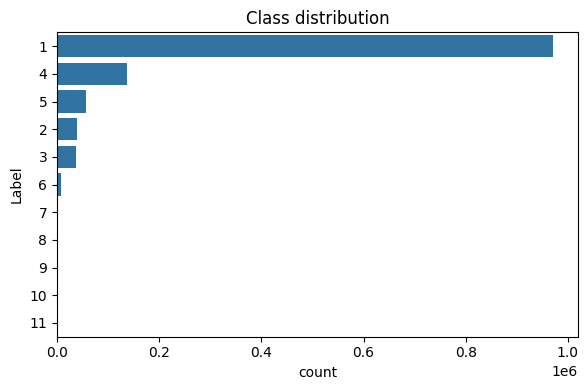

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index)
plt.title("Class distribution")
plt.tight_layout()
plt.show()


In [4]:
# show some stats for numeric columns
print(df.describe().T.sort_values(by='std', ascending=False).head(20))
# list any object columns
print("Object columns:", df.select_dtypes(include=['object']).columns.tolist())


                   count          mean           std           min    25%  \
Flow IAT Max   1252846.0  6.390905e+06  7.950531e+08 -8.282200e+11  458.0   
Flow Duration  1252846.0  1.123717e+07  7.594986e+08 -8.282200e+11  551.0   
Fwd IAT Mean   1252846.0  4.155316e+06  7.404482e+08 -8.282200e+11    1.0   
Flow IAT Mean  1252846.0  3.891897e+06  7.404437e+08 -8.282200e+11  292.0   
Idle Max       1252846.0  5.441625e+06  2.907424e+08  0.000000e+00    0.0   
Fwd IAT Std    1252846.0  1.054539e+06  2.497172e+08  0.000000e+00    0.0   
Flow IAT Std   1252846.0  1.026042e+06  2.497161e+08  0.000000e+00    0.0   
Idle Mean      1252846.0  5.227947e+06  1.773220e+08  0.000000e+00    0.0   
Idle Std       1252846.0  2.379458e+05  1.262057e+08  0.000000e+00    0.0   
Fwd IAT Tot    1252846.0  1.174706e+07  3.063698e+07  0.000000e+00    1.0   
Idle Min       1252846.0  4.966927e+06  2.632555e+07  0.000000e+00    0.0   
Bwd IAT Tot    1252846.0  6.492204e+06  2.396192e+07  0.000000e+00    0.0   